# Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.

In [1]:
#import Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [2]:
#create filepath
city_filepath = os.path.join("raw_data","city_data.csv")
ride_filepath = os.path.join("raw_data","ride_data.csv")

In [3]:
#read csv to data-frames
city_df = pd.read_csv(city_filepath)
ride_df = pd.read_csv(ride_filepath)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
#merge the two data frames
merge_df = pd.merge(city_df, ride_df, on = "city", how = "outer")
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [6]:
#extract the values for the bubble-plot
avg_fare = merge_df.groupby("city")["fare"].mean()
num_rides = merge_df.groupby("city")["ride_id"].count()
drivers = merge_df.groupby("city")["driver_count"].mean()
city_type = merge_df.groupby(["city"])["type"].unique()

In [7]:
#create a dataframe with the above info
bubble_df = pd.DataFrame({"Average Fare": avg_fare,
                          "Total Rides" : num_rides,
                          "Total Drivers" : drivers,
                          "City Type" : city_type
                         })

bubble_df.head()

,Average Fare,City Type,Total Drivers,Total Rides
city,,,,
Alvarezhaven,23.928710,[Urban],21,31
Alyssaberg,20.609615,[Urban],67,26
Anitamouth,37.315556,[Suburban],16,9
Antoniomouth,23.625000,[Urban],21,22
Aprilchester,21.981579,[Urban],49,19


In [8]:
#multiply total drivers by 5 to increase visibility
bubble_df["Total Drivers"] = bubble_df["Total Drivers"] * 5

In [9]:
#clean data-frame
bubble_df['City Type'] = bubble_df['City Type'].str[0]
bubble_df.head()

,Average Fare,City Type,Total Drivers,Total Rides
city,,,,
Alvarezhaven,23.928710,Urban,105,31
Alyssaberg,20.609615,Urban,335,26
Anitamouth,37.315556,Suburban,80,9
Antoniomouth,23.625000,Urban,105,22
Aprilchester,21.981579,Urban,245,19


In [10]:
#Split bubble_df into 3 dataframes based on city-type
urban_df = bubble_df[bubble_df["City Type"] == "Urban"]
suburb_df = bubble_df[bubble_df["City Type"] == "Suburban"]
rural_df = bubble_df[bubble_df["City Type"] == "Rural"]

In [11]:
#City-type will be used as the 4th dimension(color) of the bubble-plot
#Assign lightcoral to urban,lightblue to suburban and gold to Rural

urban_df = urban_df.replace("Urban","lightcoral")
suburb_df = suburb_df.replace("Suburban","lightblue")
rural_df = rural_df.replace("Rural","gold")

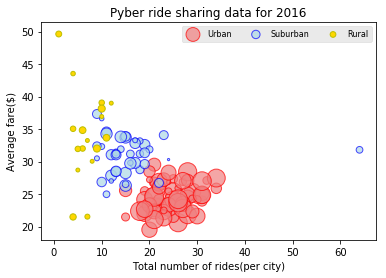

In [12]:
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average fare($)")
plt.title("Pyber ride sharing data for 2016")

urban_plot = plt.scatter (urban_df["Total Rides"], urban_df["Average Fare"], c = urban_df["City Type"], \
                         s = urban_df["Total Drivers"], cmap=cm.jet, alpha = 0.7, edgecolor = "r")
suburb_plot = plt.scatter (suburb_df["Total Rides"], suburb_df["Average Fare"], c = suburb_df["City Type"],\
                         s = suburb_df["Total Drivers"], cmap=cm.jet, alpha = 0.7, edgecolor = "b")
rural_plot = plt.scatter (rural_df["Total Rides"], rural_df["Average Fare"], c = rural_df["City Type"], \
                         s = rural_df["Total Drivers"], cmap=cm.jet, edgecolor = "y")

plt.style.use('ggplot')

plt.legend((urban_plot, suburb_plot, rural_plot),('Urban', 'Suburban', 'Rural'), scatterpoints=1, loc='upper right',\
           ncol=3, fontsize=8)

plt.show()

# Trends
- There is a direct relation between number of drivers and the average fare.
- The large variation in fare for rural areas with comparable drivers may be related to geographical area.
- The higher fares for Rural & suburban drivers can also be related to their higher ride distance

In [13]:
#groupby city type to get % of total fare
total_fare = pd.DataFrame(merge_df.groupby("type")["fare"].sum())
total_fare["fare"].sort_values()

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

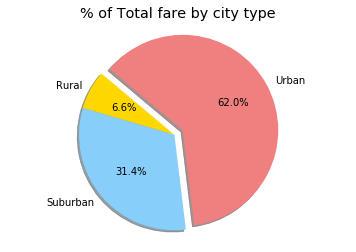

In [14]:
# Data to plot
labels = total_fare.index
sizes = total_fare["fare"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.style.use('ggplot') 
plt.axis('equal')
plt.title("% of Total fare by city type")
plt.show()

In [15]:
#groupby city type to get % of total rides
total_rides = pd.DataFrame(merge_df.groupby("type")["ride_id"].count())
total_rides["ride_id"].sort_values()

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

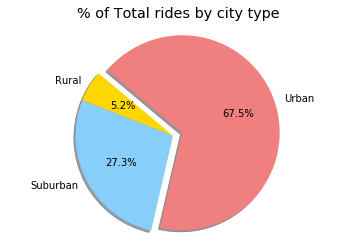

In [16]:
# Data to plot
labels = total_rides.index
sizes = total_rides["ride_id"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("% of Total rides by city type")
plt.show()

In [17]:
#groupby city type to get % of total drivers
total_drivers = pd.DataFrame(merge_df.groupby("type")["driver_count"].sum())
total_drivers["driver_count"].sort_values()

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

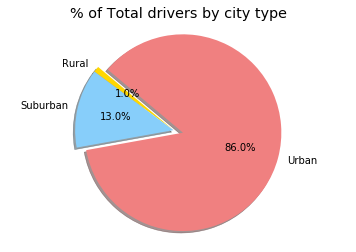

In [18]:
# Data to plot
labels = total_drivers.index
sizes = total_drivers["driver_count"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("% of Total drivers by city type")
plt.axis('equal')
plt.show()